## Problem Statement
> The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
 
Link to the case file: vehicle.csvView in a new window

 
The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [85]:
# Numerical libraries
import numpy as np   
import warnings
warnings.filterwarnings('ignore')
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial import distance
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [86]:
vehicles_df = pd.read_csv("vehicle.csv")

In [87]:
vehicles_df.head(2)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van

## Performinf EDA

In [88]:
vehicles_df.shape

(846, 19)

In [89]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

### We can see null values in circularity ,distance_circularity, radius_ratio ,pr.axis_aspect_ratio ,elongatedness etc                                            

In [90]:
vehicles_df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [91]:
vehicles_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

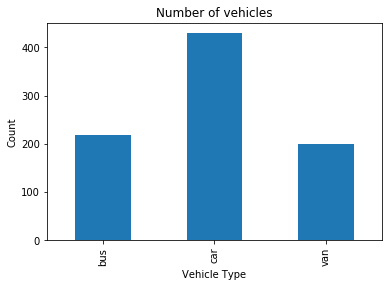

In [92]:
plt.figure()
pd.Series(vehicles_df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Vehicle Type")
plt.title('Number of vehicles');

In [93]:
vehicles_df.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

In [94]:
vehicles_df.columns[vehicles_df.isna().any() == True]

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')

In [95]:
vehicles_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

#### All the missing values have been removed

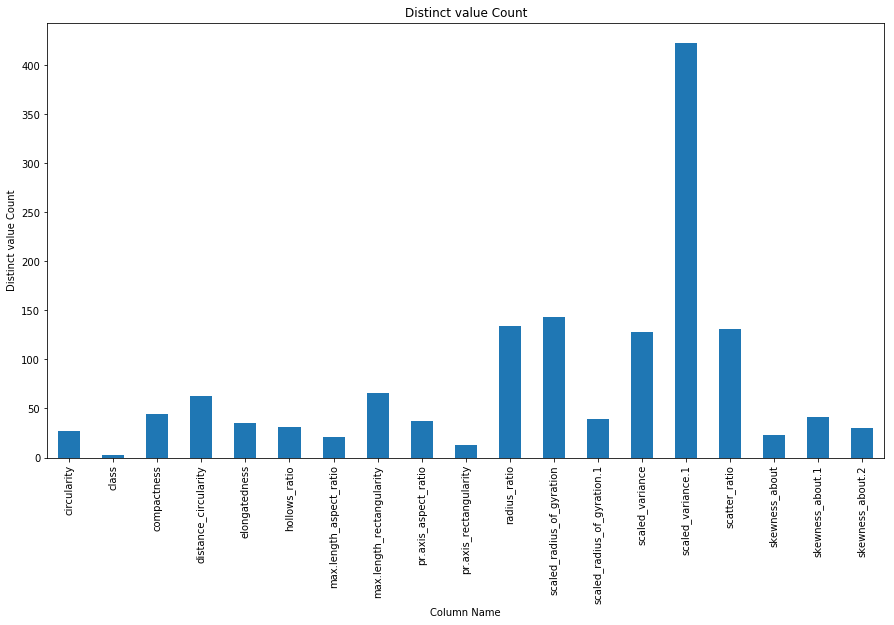

In [96]:
plt.figure(figsize=(15,8))
pd.Series(vehicles_df.nunique().sort_index()).plot(kind = 'bar')
plt.ylabel("Distinct value Count")
plt.xlabel("Column Name")
plt.title('Distinct value Count');

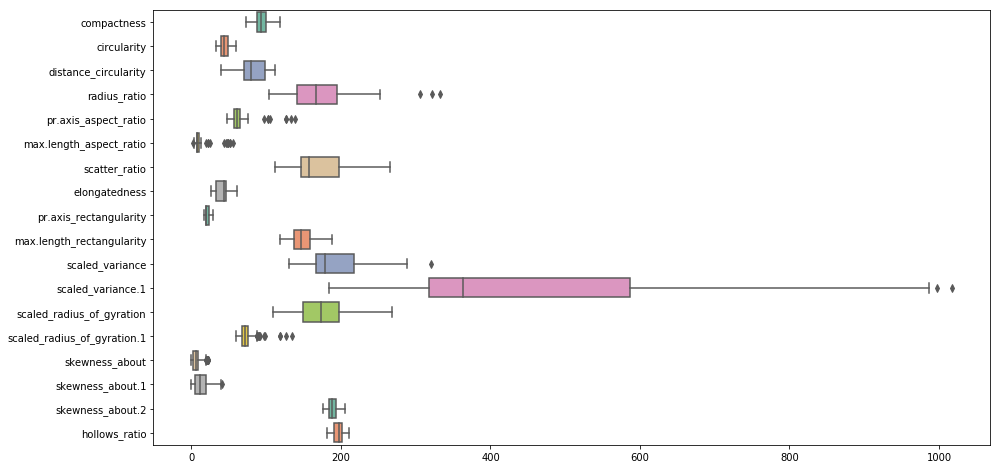

In [97]:
plt.figure(figsize=(15,8))
sns.boxplot(data=vehicles_df, orient="h", palette="Set2")

In [98]:
vehicles_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

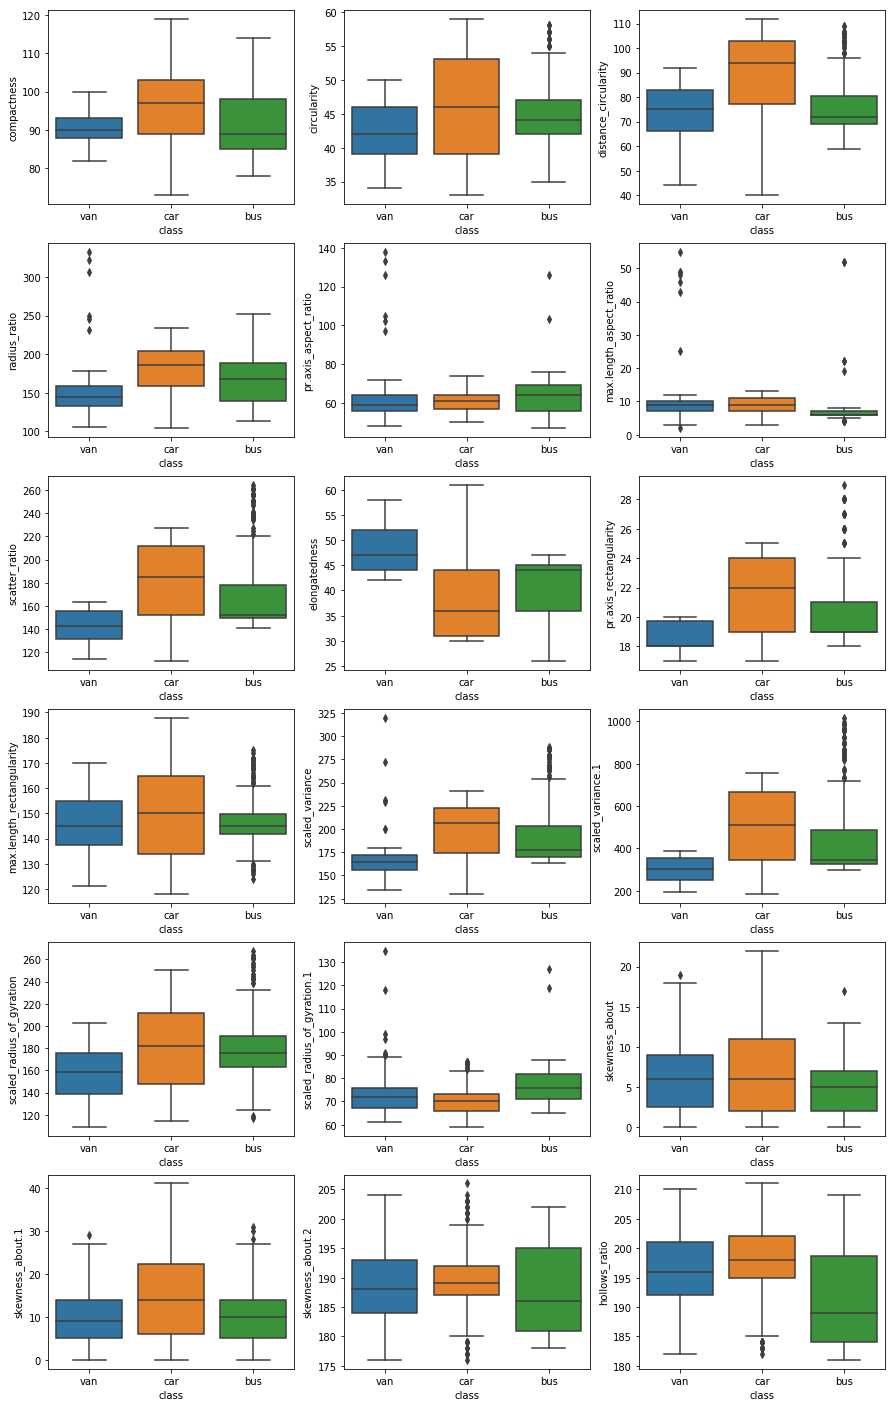

In [99]:
from matplotlib import gridspec
fig, axs = plt.subplots(6, 3,figsize=(15,25))
for i,el in enumerate(list(vehicles_df.columns.values)[:-1]):
    sns.boxplot(x='class',y=el,data = vehicles_df, ax=axs[int(i/3)][i%3])

In [100]:
vehicles_df.median().values

array([ 93. ,  44. ,  80. , 167. ,  61. ,   8. , 157. ,  43. ,  20. ,
       146. , 179. , 363.5, 173.5,  71.5,   6. ,  11. , 188. , 197. ])

In [101]:
vehicles_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

### Handling Missing Values

In [102]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [104]:
vehicles_df_X = vehicles_df.drop('class',axis=1)

In [105]:
vehicles_df_X.sample()

compactness  circularity  distance_circularity  radius_ratio  \
530           88         48.0                  90.0         178.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
530                  60.0                        8          175.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
530           38.0                    21.0                        152   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
530            200.0              460.0                      198.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
530                         68.0            13.0              16.0   

     skewness_about.2  hollows_ratio  
530             192.0            199

In [106]:
imputer.fit(vehicles_df_X)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [107]:
imputer.statistics_

array([ 93. ,  44. ,  80. , 167. ,  61. ,   8. , 157. ,  43. ,  20. ,
       146. , 179. , 363.5, 173.5,  71.5,   6. ,  11. , 188. , 197. ])

In [108]:
X = imputer.transform(vehicles_df_X)
vehicles_df_X = pd.DataFrame(X, columns=vehicles_df_imputed.columns,
                          index=vehicles_df_imputed.index)

In [109]:
vehicles_df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

In [110]:
#vehicles_df_outliers = vehicles_df_imputed[['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio',,
                                           #'scaled_variance.1','scaled_radius_of_gyration.1']]
Q3 = vehicles_df_X.quantile(0.75)
Q1 = vehicles_df_X.quantile(0.25)
vehicles_df_outliers_iqr = Q3 - Q1
mini = Q1 - 1.5*vehicles_df_outliers_iqr
maxi = Q3 + 1.5*vehicles_df_outliers_iqr
vehicles_df_outliers_iqr

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64

In [24]:
#### All the outliers lie on the right so we will consider maximum 

In [111]:
maximum_radius_ratio_ids = vehicles_df_X[vehicles_df_X['radius_ratio']>maxi['radius_ratio']]['radius_ratio'].index
maximum_axis_aspect_ratio_ids = vehicles_df_X[vehicles_df_X['pr.axis_aspect_ratio']>maxi['pr.axis_aspect_ratio']]['pr.axis_aspect_ratio'].index
maximum_length_aspect_ratio_ids = vehicles_df_imputed[vehicles_df_X['max.length_aspect_ratio']>maxi['max.length_aspect_ratio']]['max.length_aspect_ratio'].index
maximum_scaled_radius_of_gyration_1_ids = vehicles_df_X[vehicles_df_X['scaled_radius_of_gyration.1']>maxi['scaled_radius_of_gyration.1']]['scaled_radius_of_gyration.1'].index

print(maximum_radius_ratio_ids.size)
print(maximum_axis_aspect_ratio_ids.size)
print(maximum_length_aspect_ratio_ids.size)
print(maximum_scaled_radius_of_gyration_1_ids.size)

print(vehicles_df.loc[maximum_radius_ratio_ids]['class'].value_counts())
print(vehicles_df.loc[maximum_axis_aspect_ratio_ids]['class'].value_counts())
print(vehicles_df.loc[maximum_length_aspect_ratio_ids]['class'].value_counts())
print(vehicles_df.loc[maximum_scaled_radius_of_gyration_1_ids]['class'].value_counts())

3
8
12
15
van    3
Name: class, dtype: int64
van    6
bus    2
Name: class, dtype: int64
van    7
bus    5
Name: class, dtype: int64
van    9
bus    6
Name: class, dtype: int64


In [112]:
vehicles_df_X_updated = vehicles_df_imputed[vehicles_df_X < maxi].apply(lambda x: x.fillna(x.median()),axis=0)

In [113]:
vehicles_df_X_updated.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.330969   32.147908  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.154846    5.613458   47.0   57.00   
max.length_aspect_ratio      846.0    8.111111    2.074801    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.569740    2.572358   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.427896   31.034970  130.0  167.00   
scaled_variance.1            846.0  437.788416  174.347077  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   71.724586    5.912661   59.0   67.00   
skewness_about               846.0    6.126478    4.575917    0.0    2.00   
skewness_about.1             846.0   12.530733    8.827251    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%    max  
compactness                   93.0  100.00  119.0  
circularity                   44.0   49.00   59.0  
distance_circularity          80.0   98.00  112.0  
radius_ratio                 167.0  194.75  252.0  
pr.axis_aspect_ratio          61.0   65.00   76.0  
max.length_aspect_ratio        8.0   10.00   13.0  
scatter_ratio                157.0  198.00  265.0  
elongatedness                 43.0   46.00   61.0  
pr.axis_rectangularity        20.0   23.00   28.0  
max.length_rectangularity    146.0  159.00  188.0  
scaled_variance              178.5  216.75  288.0  
scaled_variance.1            363.0  586.00  987.0  
scaled_radius_of_gyration    173.5  198.00  268.0  
scaled_radius_of_gyration.1   71.0   75.00   86.0  
skewness_about                 5.0    9.00   19.0  
skewness_about.1              11.0   19.00   39.0  
skewness_about.2             188.0  193.00  206.0  
hollows_ratio                197.0  201.00  211.0

In [114]:
vehicles_df_X_updated['class'] = vehicles_df['class']

#### Lables are Blue - Van
#### Lables are Orange - car
#### Lables are Green - Bus

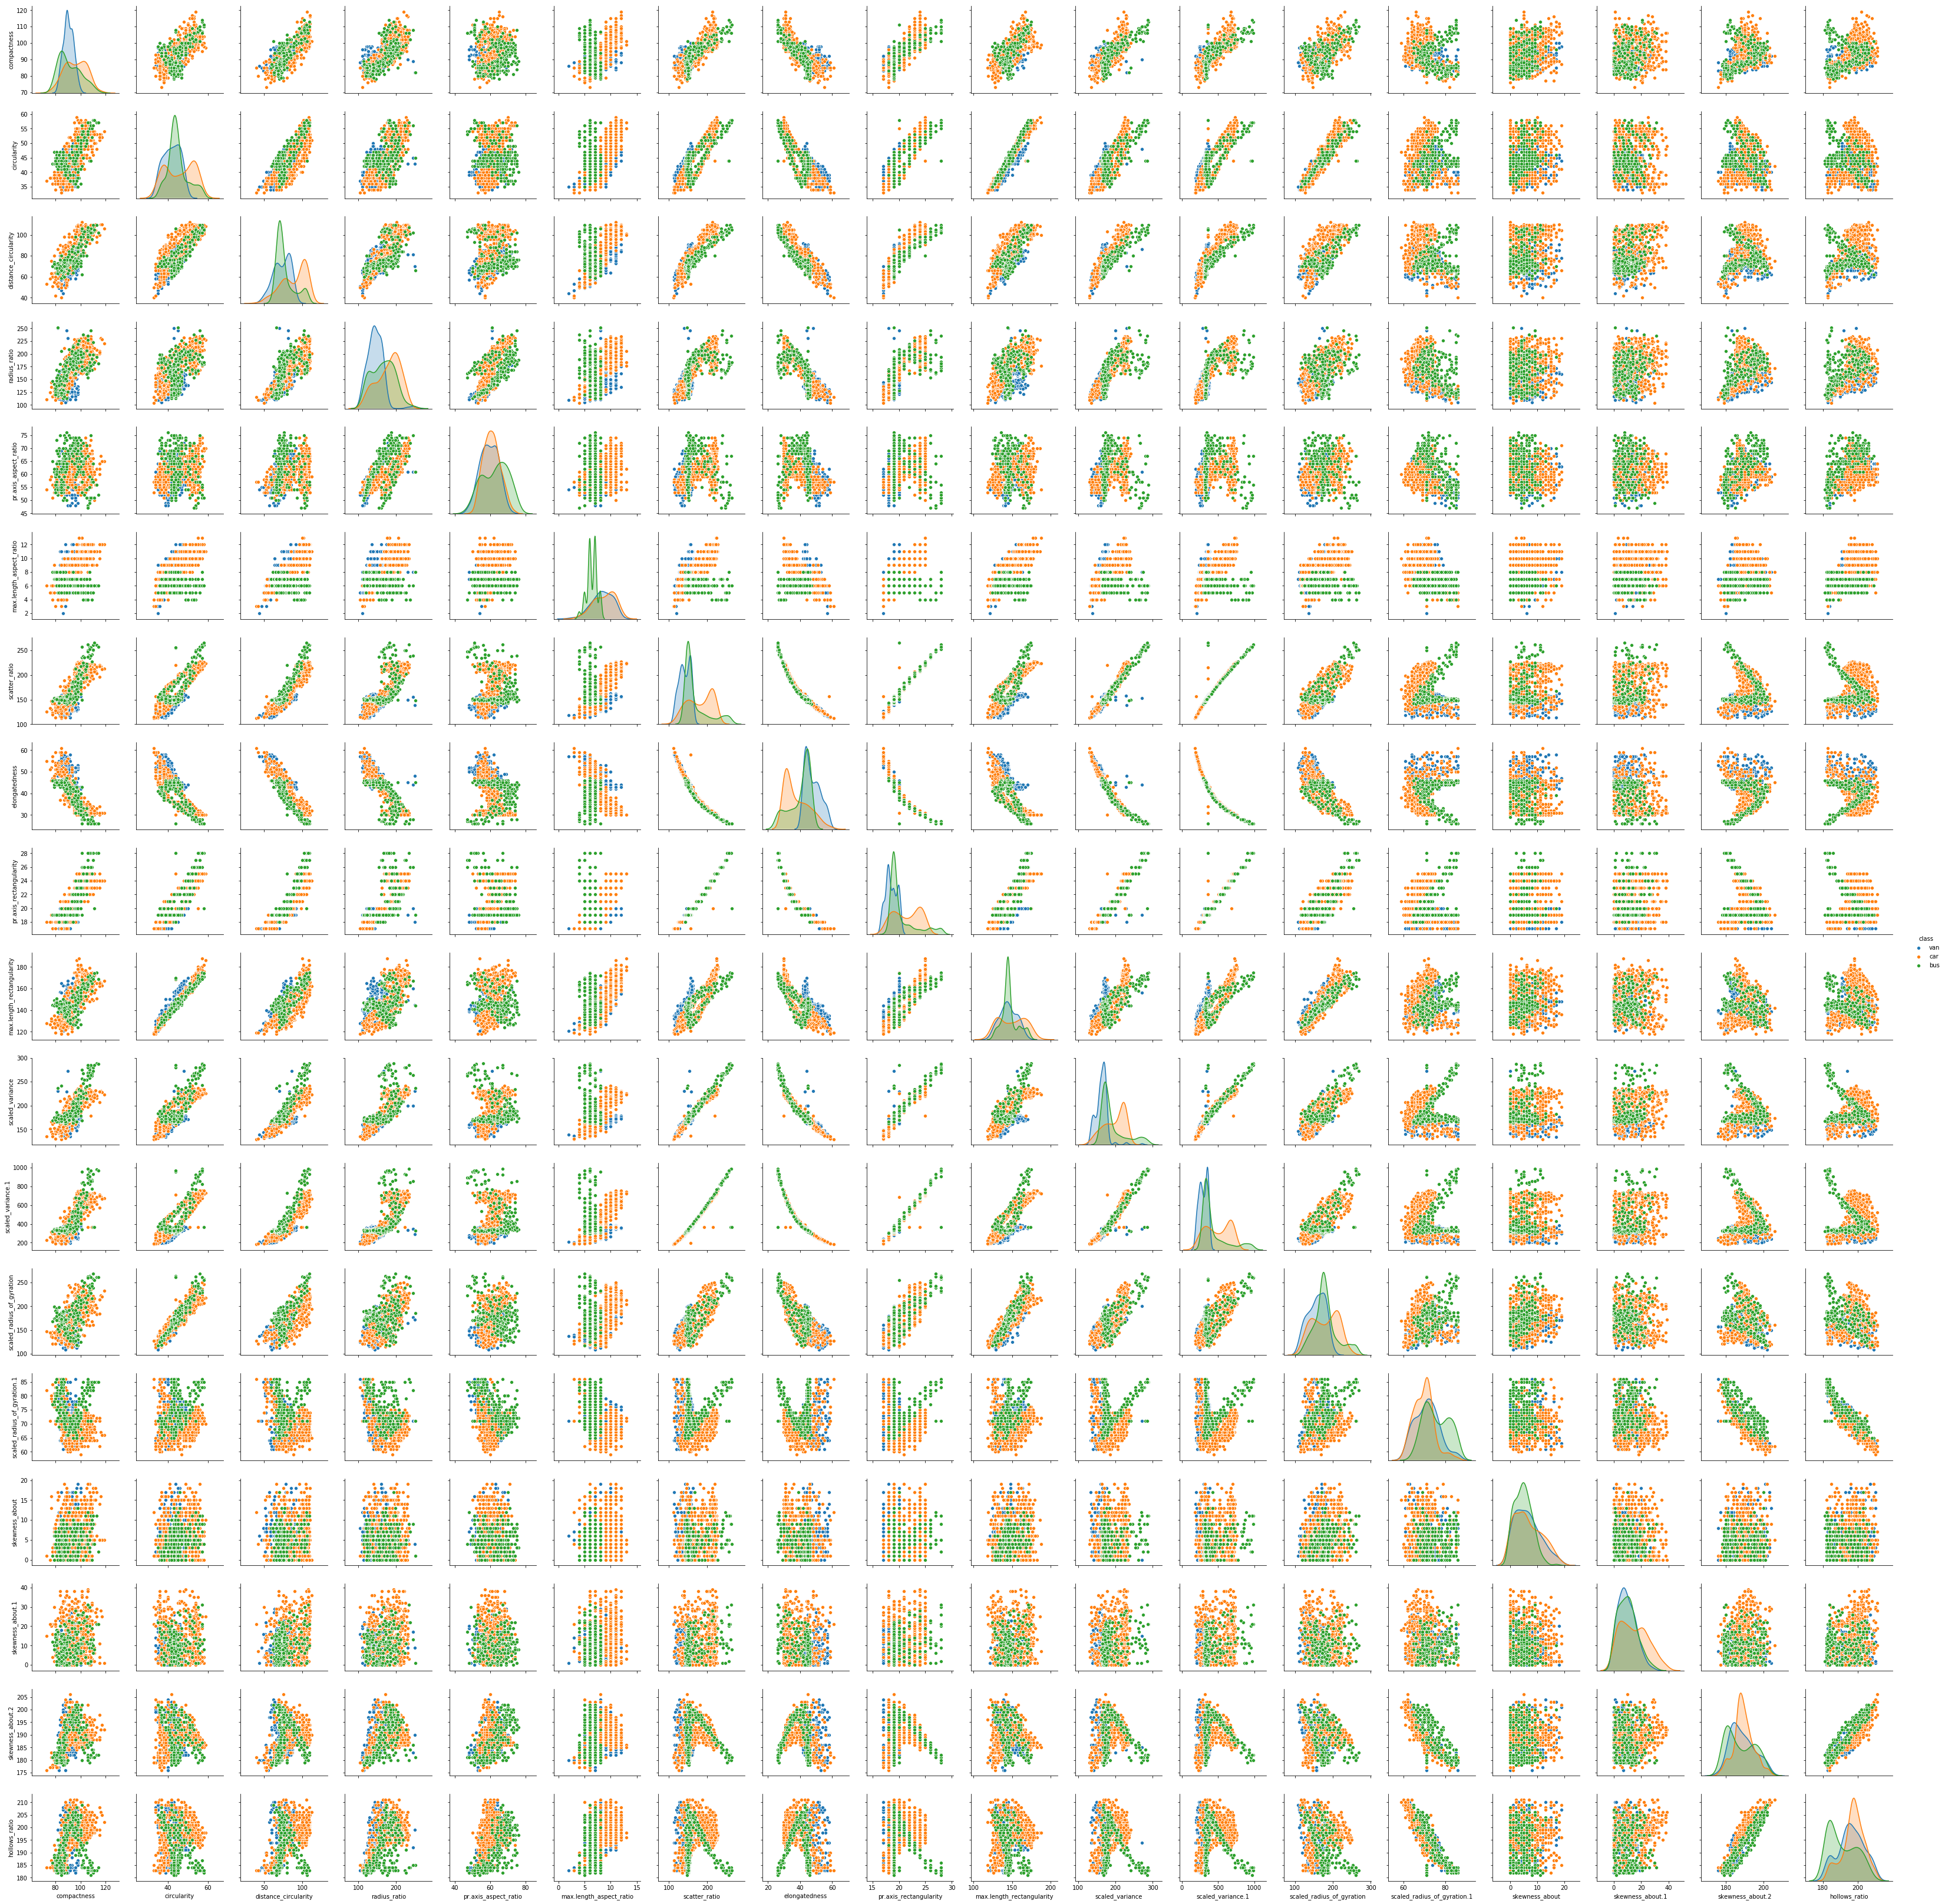

In [115]:
sns.pairplot(vehicles_df_X_updated, diag_kind='kde',hue='class')

In [116]:
#vehicles_df_updated = pd.get_dummies(vehicles_df_updated, columns=['class'])
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
vehicles_df_updated['class'] = le.fit_transform(vehicles_df_updated['class'])

In [117]:
vehicles_df_updated['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

In [118]:
list(le.classes_)

[0, 1, 2]

In [119]:
vehicles_df_imputed_corr = vehicles_df_updated.corr()
vehicles_df_imputed_corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.500544     0.563064              0.671657   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.810108     0.839818              0.892626   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806162     0.827454              0.883937   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.223866     0.094930             -0.198585   
skewness_about                  0.193520     0.135064              0.097522   
skewness_about.1                0.156613    -0.004763              0.266579   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.467778              0.153883   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.746937              0.171564   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760255              0.196406   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.360284             -0.293696   
skewness_about                   0.034001             -0.056104   
skewness_about.1                 0.180299             -0.021101   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   
class                           -0.213948             -0.209298   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.500544       0.812620   
circularity                                 0.563064       0.847938   
distance_circularity                        0.671657       0.905076   
radius_ratio                                0.467778       0.769941   
pr.axis_aspect_ratio                        0.153883       0.194195   
max.length_aspect_ratio                     1.000000       0.493374   
scatter_ratio                               0.493374       1.000000   
elongatedness                              -0.508621      -0.971601   
pr.axis_rectangularity                      0.497452       0.983996   
max.length_rectangularity                   0.645768       0.809083   
scaled_variance                             0.404775       0.960883   
scaled_variance.1                           0.465376       0.980435   
scaled_radius_of_gyration                   0.399315       0.799875   
scaled_radius_of_gyration.1                -0.299527       0.031205   
skewness_about                            

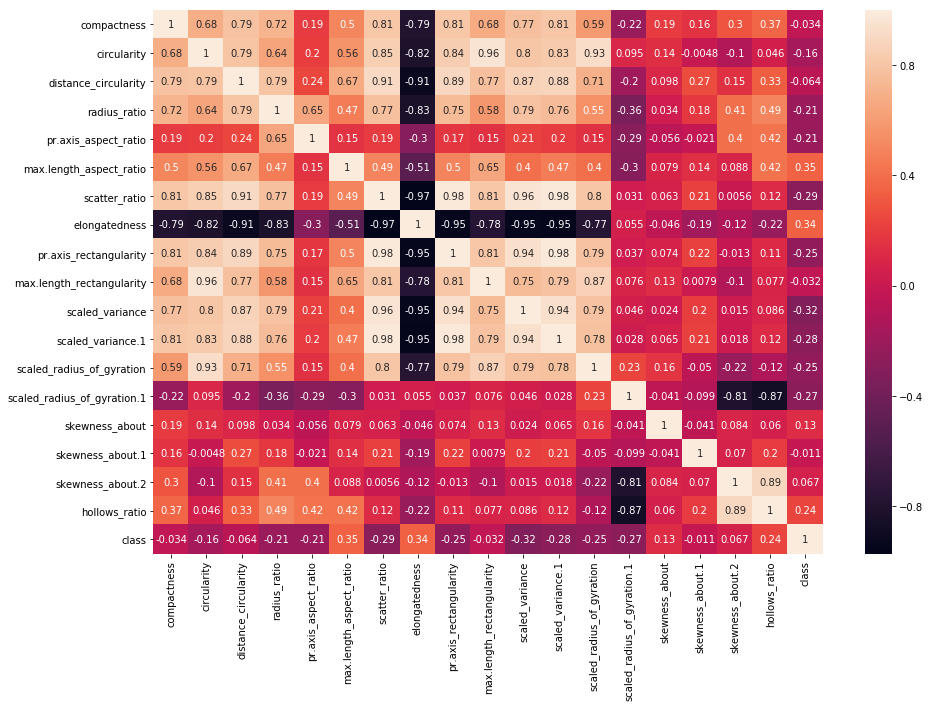

In [120]:
plt.figure(figsize=(15,10))
sns.heatmap(vehicles_df_imputed_corr, annot=True)

In [122]:
vehicles_df_imputed_corr[abs(vehicles_df_imputed_corr) > (0.70)]

compactness  circularity  distance_circularity  \
compactness                     1.000000          NaN              0.789928   
circularity                          NaN     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925          NaN              0.794222   
pr.axis_aspect_ratio                 NaN          NaN                   NaN   
max.length_aspect_ratio              NaN          NaN                   NaN   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.810108     0.839818              0.892626   
max.length_rectangularity            NaN     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806162     0.827454              0.883937   
scaled_radius_of_gyration            NaN     0.925816              0.705771   
scaled_radius_of_gyration.1          NaN          NaN                   NaN   
skewness_about                       NaN          NaN                   NaN   
skewness_about.1                     NaN          NaN                   NaN   
skewness_about.2                     NaN          NaN                   NaN   
hollows_ratio                        NaN          NaN                   NaN   
class                                NaN          NaN                   NaN   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925                   NaN   
circularity                           NaN                   NaN   
distance_circularity             0.794222                   NaN   
radius_ratio                     1.000000                   NaN   
pr.axis_aspect_ratio                  NaN                   1.0   
max.length_aspect_ratio               NaN                   NaN   
scatter_ratio                    0.769941                   NaN   
elongatedness                   -0.825392                   NaN   
pr.axis_rectangularity           0.746937                   NaN   
max.length_rectangularity             NaN                   NaN   
scaled_variance                  0.786183                   NaN   
scaled_variance.1                0.760255                   NaN   
scaled_radius_of_gyration             NaN                   NaN   
scaled_radius_of_gyration.1           NaN                   NaN   
skewness_about                        NaN                   NaN   
skewness_about.1                      NaN                   NaN   
skewness_about.2                      NaN                   NaN   
hollows_ratio                         NaN                   NaN   
class                                 NaN                   NaN   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                      NaN       0.812620   
circularity                                      NaN       0.847938   
distance_circularity                             NaN       0.905076   
radius_ratio                                     NaN       0.769941   
pr.axis_aspect_ratio                             NaN            NaN   
max.length_aspect_ratio                          1.0            NaN   
scatter_ratio                                    NaN       1.000000   
elongatedness                                    NaN      -0.971601   
pr.axis_rectangularity                           NaN       0.983996   
max.length_rectangularity                        NaN       0.809083   
scaled_variance                                  NaN       0.960883   
scaled_variance.1                                NaN       0.980435   
scaled_radius_of_gyration                        NaN       0.799875   
scaled_radius_of_gyration.1                      NaN            NaN   
skewness_about                            

In [123]:
X = vehicles_df_updated.drop(['class'],axis=1)
y = vehicles_df_updated['class']

In [124]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)
cov_matrix = np.cov(X_std.T)

In [127]:
pd.DataFrame(cov_matrix, columns=X.columns, index=X.columns)

compactness  circularity  distance_circularity  \
compactness                     1.001183     0.685698              0.790863   
circularity                     0.685698     1.001183              0.793258   
distance_circularity            0.790863     0.793258              1.001183   
radius_ratio                    0.722780     0.639035              0.795162   
pr.axis_aspect_ratio            0.193093     0.203493              0.244622   
max.length_aspect_ratio         0.501136     0.563730              0.672452   
scatter_ratio                   0.813582     0.848941              0.906147   
elongatedness                  -0.789683    -0.822444             -0.912385   
pr.axis_rectangularity          0.811067     0.840812              0.893682   
max.length_rectangularity       0.676943     0.962456              0.775444   
scaled_variance                 0.770782     0.803718              0.870613   
scaled_variance.1               0.807116     0.828433              0.884983   
scaled_radius_of_gyration       0.585935     0.926912              0.706607   
scaled_radius_of_gyration.1    -0.224130     0.095042             -0.198820   
skewness_about                  0.193749     0.135224              0.097638   
skewness_about.1                0.156798    -0.004768              0.266895   
skewness_about.2                0.298890    -0.104550              0.146271   
hollows_ratio                   0.365984     0.046406              0.333126   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.722780              0.193093   
circularity                      0.639035              0.203493   
distance_circularity             0.795162              0.244622   
radius_ratio                     1.001183              0.651324   
pr.axis_aspect_ratio             0.651324              1.001183   
max.length_aspect_ratio          0.468332              0.154065   
scatter_ratio                    0.770852              0.194425   
elongatedness                   -0.826369             -0.298497   
pr.axis_rectangularity           0.747821              0.171767   
max.length_rectangularity        0.580154              0.147766   
scaled_variance                  0.787114              0.207346   
scaled_variance.1                0.761155              0.196639   
scaled_radius_of_gyration        0.551426              0.148767   
scaled_radius_of_gyration.1     -0.360711             -0.294044   
skewness_about                   0.034041             -0.056171   
skewness_about.1                 0.180513             -0.021126   
skewness_about.2                 0.406330              0.401356   
hollows_ratio                    0.492340              0.416226   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.501136       0.813582   
circularity                                 0.563730       0.848941   
distance_circularity                        0.672452       0.906147   
radius_ratio                                0.468332       0.770852   
pr.axis_aspect_ratio                        0.154065       0.194425   
max.length_aspect_ratio                     1.001183       0.493957   
scatter_ratio                               0.493957       1.001183   
elongatedness                              -0.509223      -0.972751   
pr.axis_rectangularity                      0.498040       0.985161   
max.length_rectangularity                   0.646532       0.810041   
scaled_variance                             0.405254       0.962020   
scaled_variance.1                           0.465927       0.981596   
scaled_radius_of_gyration                   0.399788       0.800821   
scaled_radius_of_gyration.1                -0.299882       0.031242   
skewness_about                              0.079193       0.063250   
skewness_about.1                            0.144725       0.214497   
skewness_about.2                            0.

In [128]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [129]:
pd.DataFrame(eigenvalues, columns=['Eigen Values']).T

0         1         2         3         4         5   \
Eigen Values  9.746557  3.313678  1.189184  1.129249  0.882587  0.675722   

                    6         7         8         9         10        11  \
Eigen Values  0.317732  0.235831  0.150229  0.091717  0.074538  0.065301   

                    12        13        14        15        16       17  
Eigen Values  0.042037  0.008315  0.032397  0.029558  0.016438  0.02023

In [130]:
pd.DataFrame(eigenvectors, index=X.columns)

0         1         2         3         4   \
compactness                 -0.272191 -0.089472  0.036613  0.141105 -0.129686   
circularity                 -0.287424  0.131974  0.201009 -0.033894  0.139066   
distance_circularity        -0.302395 -0.047259 -0.067761  0.108410  0.080613   
radius_ratio                -0.269488 -0.200601 -0.047974 -0.253980 -0.140545   
pr.axis_aspect_ratio        -0.097756 -0.258690  0.078013 -0.610090 -0.144015   
max.length_aspect_ratio     -0.196186 -0.107558  0.133701  0.275674  0.628550   
scatter_ratio               -0.310578  0.073346 -0.106996  0.002664 -0.084132   
elongatedness                0.309089 -0.011172  0.086668  0.066545  0.078605   
pr.axis_rectangularity      -0.307356  0.080699 -0.104832  0.028860 -0.077301   
max.length_rectangularity   -0.278368  0.122097  0.211502  0.045819  0.253114   
scaled_variance             -0.299800  0.075387 -0.139804 -0.067409 -0.146371   
scaled_variance.1           -0.306003  0.069705 -0.109329 -0.004363 -0.109813   
scaled_radius_of_gyration   -0.263529  0.210393  0.204850 -0.080577  0.005924   
scaled_radius_of_gyration.1  0.032138  0.499236 -0.069611 -0.117077 -0.144452   
skewness_about              -0.035453 -0.011786  0.547040  0.494993 -0.566060   
skewness_about.1            -0.059673 -0.087451 -0.684988  0.408370 -0.143039   
skewness_about.2            -0.037139 -0.504392  0.065864 -0.019031 -0.173250   
hollows_ratio               -0.083915 -0.510342  0.040139  0.100992  0.114855   

                                   5         6         7         8         9   \
compactness                 -0.261926 -0.196416  0.719653 -0.435170 -0.168967   
circularity                  0.073770  0.392158  0.064911 -0.053606  0.082048   
distance_circularity         0.020788 -0.164083 -0.255936  0.019900 -0.293588   
radius_ratio                 0.132311 -0.155405 -0.123912 -0.194961 -0.204650   
pr.axis_aspect_ratio         0.573941 -0.089112  0.159506 -0.045132  0.146133   
max.length_aspect_ratio      0.315806 -0.399999  0.060547  0.141171 -0.126860   
scatter_ratio               -0.104596 -0.090349 -0.061063  0.091793  0.172985   
elongatedness                0.079757  0.105873  0.165722 -0.279582  0.008213   
pr.axis_rectangularity      -0.102321 -0.103836 -0.027672  0.042499  0.391121   
max.length_rectangularity    0.085791  0.350174  0.208485  0.062713  0.293099   
scaled_variance             -0.142189 -0.064822 -0.182011  0.032444 -0.313375   
scaled_variance.1           -0.125313 -0.091383 -0.039640  0.089971  0.405253   
scaled_radius_of_gyration    0.059397  0.461355 -0.158404 -0.166792 -0.412948   
scaled_radius_of_gyration.1  0.162951 -0.097192  0.425219  0.589385 -0.273428   
skewness_about               0.308085 -0.122932 -0.118743  0.047800  0.052148   
skewness_about.1             0.460593  0.306593  0.096985 -0.076737 -0.014466   
skewness_about.2            -0.262938  0.252975  0.161766  0.420636 -0.138376   
hollows_ratio               -0.039251  0.166995  0.047115  0.292575 -0.022838   

                                   10        11        12        13        14  \
compactness                 -0.123901 -0.011633  0.086052  0.050764  0.078364   
circularity                  0.128082 -0.175210 -0.002955  0.060108  0.304170   
distance_circularity        -0.411458 -0.686203 -0.204621 -0.002760 -0.114241   
radius_ratio                 0.532156  0.067552 -0.418796 -0.013146  0.231297   
pr.axis_aspect_ratio        -0.235991 -0.051886  0.174654 -0.015393 -0.150317   
max.length_aspect_ratio      0.070555  0.300235  0.120978 -0.025211 -0.151804   
scatter_ratio               -0.047044  0.065416  0.123390 -0.871109  0.162651   
elongatedness                0.043021 -0.008047 -0.577511 -0.346543 -0.484485   
pr.axis_rectangularity      -0.133292  0.171327 -0.198833  0.293919 -0.097379   
max.length_rectangularity    0.318929 -0.321365  0.030404 -0.006289 -0.193401   
scaled_variance              0.384844  0.030940  0.158462  0.086

In [131]:
variance = pd.DataFrame(eigenvalues, columns=['Variance of Eigen Vector']).T
variance = variance/eigenvalues.sum()
variance = variance.sort_values(axis=1, by='Variance of Eigen Vector', ascending=False)
variance.loc['Cumulative Variance of Eigen Vector'] = [n for n in variance.loc['Variance of Eigen Vector'].cumsum()]
variance

0         1         2         3   \
Variance of Eigen Vector             0.540835  0.183876  0.065988  0.062662   
Cumulative Variance of Eigen Vector  0.540835  0.724711  0.790699  0.853361   

                                           4         5         6         7   \
Variance of Eigen Vector             0.048975  0.037496  0.017631  0.013086   
Cumulative Variance of Eigen Vector  0.902335  0.939831  0.957462  0.970548   

                                           8         9         10        11  \
Variance of Eigen Vector             0.008336  0.005089  0.004136  0.003624   
Cumulative Variance of Eigen Vector  0.978884  0.983974  0.988110  0.991733   

                                           12        14        15        17  \
Variance of Eigen Vector             0.002333  0.001798  0.001640  0.001123   
Cumulative Variance of Eigen Vector  0.994066  0.995864  0.997504  0.998626   

                                           16        13  
Variance of Eigen Vector             0.000912  0.000461  
Cumulative Variance of Eigen Vector  0.999539  1.000000

[Text(0.2, 0.5408353301645906, '0.5408'),
 Text(1.2, 0.724710972254678, '0.7247'),
 Text(2.2, 0.7906986634410935, '0.7907'),
 Text(3.2, 0.8533605717656771, '0.8534'),
 Text(4.2, 0.9023352084525811, '0.9023'),
 Text(5.2, 0.9398309655134235, '0.9398'),
 Text(6.2, 0.957461892303195, '0.9575'),
 Text(7.2, 0.9705481530628713, '0.9705'),
 Text(8.2, 0.9788843580891191, '0.9789'),
 Text(9.2, 0.9839737185904767, '0.9840'),
 Text(10.2, 0.9881098401352378, '0.9881'),
 Text(11.2, 0.9917334088626375, '0.9917'),
 Text(12.2, 0.9940660153181983, '0.9941'),
 Text(13.2, 0.9958637432894322, '0.9959'),
 Text(14.2, 0.9975039336398921, '0.9975'),
 Text(15.2, 0.9986264674952479, '0.9986'),
 Text(16.2, 0.9995385962471862, '0.9995'),
 Text(17.2, 1.0000000000000002, '1.0000')]

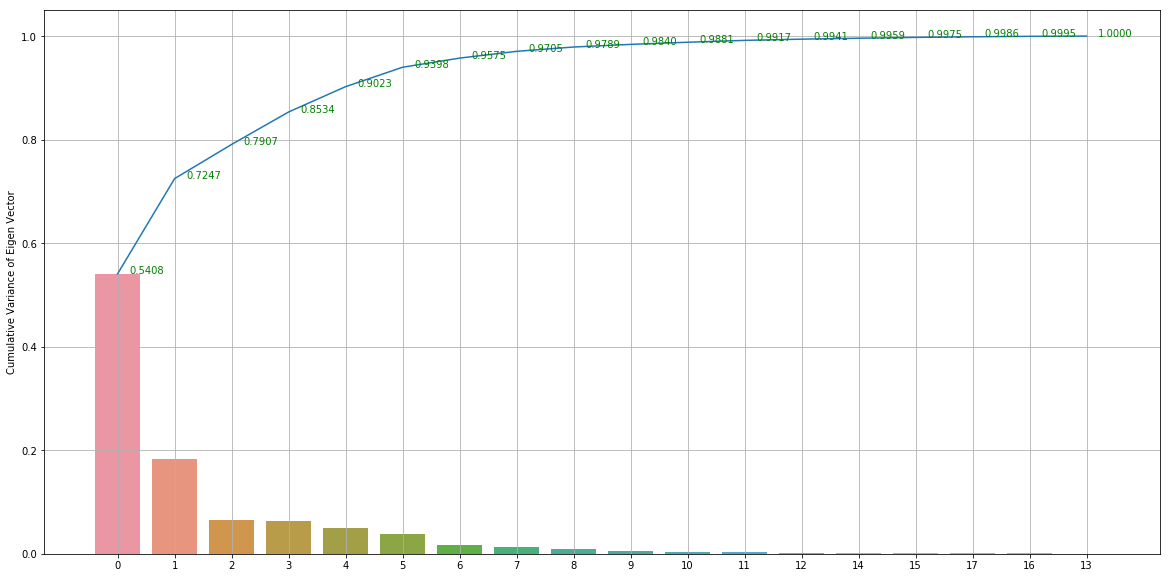

In [132]:
plt.figure(figsize=(20,10))
sns.barplot(x = variance.columns, y = variance.loc['Variance of Eigen Vector'], order=list(variance.columns))
ax = sns.lineplot(x = variance.columns.sort_values(), y = variance.loc['Cumulative Variance of Eigen Vector'])
plt.grid(axis='both')
[ax.text(p[0]+0.20, p[1], '{0:.4f}'.format(p[1]), color='g') for p in zip(ax.get_xticks(), variance.loc['Cumulative Variance of Eigen Vector'])]

### Clearly 8 components cover 97% of the variance (above 95%)

In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [136]:
pd.DataFrame(pca.components_, columns=X.columns)

compactness  circularity  distance_circularity  radius_ratio  \
0     0.272191     0.287424              0.302395      0.269488   
1    -0.089472     0.131974             -0.047259     -0.200601   
2    -0.036613    -0.201009              0.067761      0.047974   
3     0.141105    -0.033894              0.108410     -0.253980   
4     0.129686    -0.139066             -0.080613      0.140545   
5     0.261926    -0.073770             -0.020788     -0.132311   
6     0.196416    -0.392158              0.164083      0.155405   
7    -0.719653    -0.064911              0.255936      0.123912   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.097756                 0.196186       0.310578   
1             -0.258690                -0.107558       0.073346   
2             -0.078013                -0.133701       0.106996   
3             -0.610090                 0.275674       0.002664   
4              0.144015                -0.628550       0.084132   
5             -0.573941                -0.315806       0.104596   
6              0.089112                 0.399999       0.090349   
7             -0.159506                -0.060547       0.061063   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.309089                0.307356                   0.278368   
1      -0.011172                0.080699                   0.122097   
2      -0.086668                0.104832                  -0.211502   
3       0.066545                0.028860                   0.045819   
4      -0.078605                0.077301                  -0.253114   
5      -0.079757                0.102321                  -0.085791   
6      -0.105873                0.103836                  -0.350174   
7      -0.165722                0.027672                  -0.208485   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.299800           0.306003                   0.263529   
1         0.075387           0.069705                   0.210393   
2         0.139804           0.109329                  -0.204850   
3        -0.067409          -0.004363                  -0.080577   
4         0.146371           0.109813                  -0.005924   
5         0.142189           0.125313                  -0.059397   
6         0.064822           0.091383                  -0.461355   
7         0.182011           0.039640                   0.158404   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.032138        0.035453          0.059673   
1                     0.499236       -0.011786         -0.087451   
2                     0.069611       -0.547040          0.684988   
3                    -0.117077        0.494993          0.408370   
4                     0.144452        0.566060          0.143039   
5                    -0.162951       -0.308085         -0.460593   
6                     0.097192        0.122932         -0.306593   
7                    -0.425219        0.118743         -0.096985   

   skewness_about.2  hollows_ratio  
0          0.037139       0.083915  
1         -0.504392      -0.510342  
2         -0.065864      -0.040139  
3         -0.019031       0.100992  
4          0.173250      -0.114855  
5          0.262938       0.039251  
6         -0.252975      -0.166995  
7         -0.161766      -0.047115

In [135]:
pca.explained_variance_

array([9.7465567 , 3.31367844, 1.1891841 , 1.12924916, 0.88258671,
       0.67572235, 0.31773225, 0.23583145])

In [137]:
pca.explained_variance_ratio_

array([0.54083533, 0.18387564, 0.06598769, 0.06266191, 0.04897464,
       0.03749576, 0.01763093, 0.01308626])

In [138]:
X_pca = pca.transform(X_std)
X_pca.shape

(846, 8)

In [155]:
Proj_data_df = pd.DataFrame(X_pca);

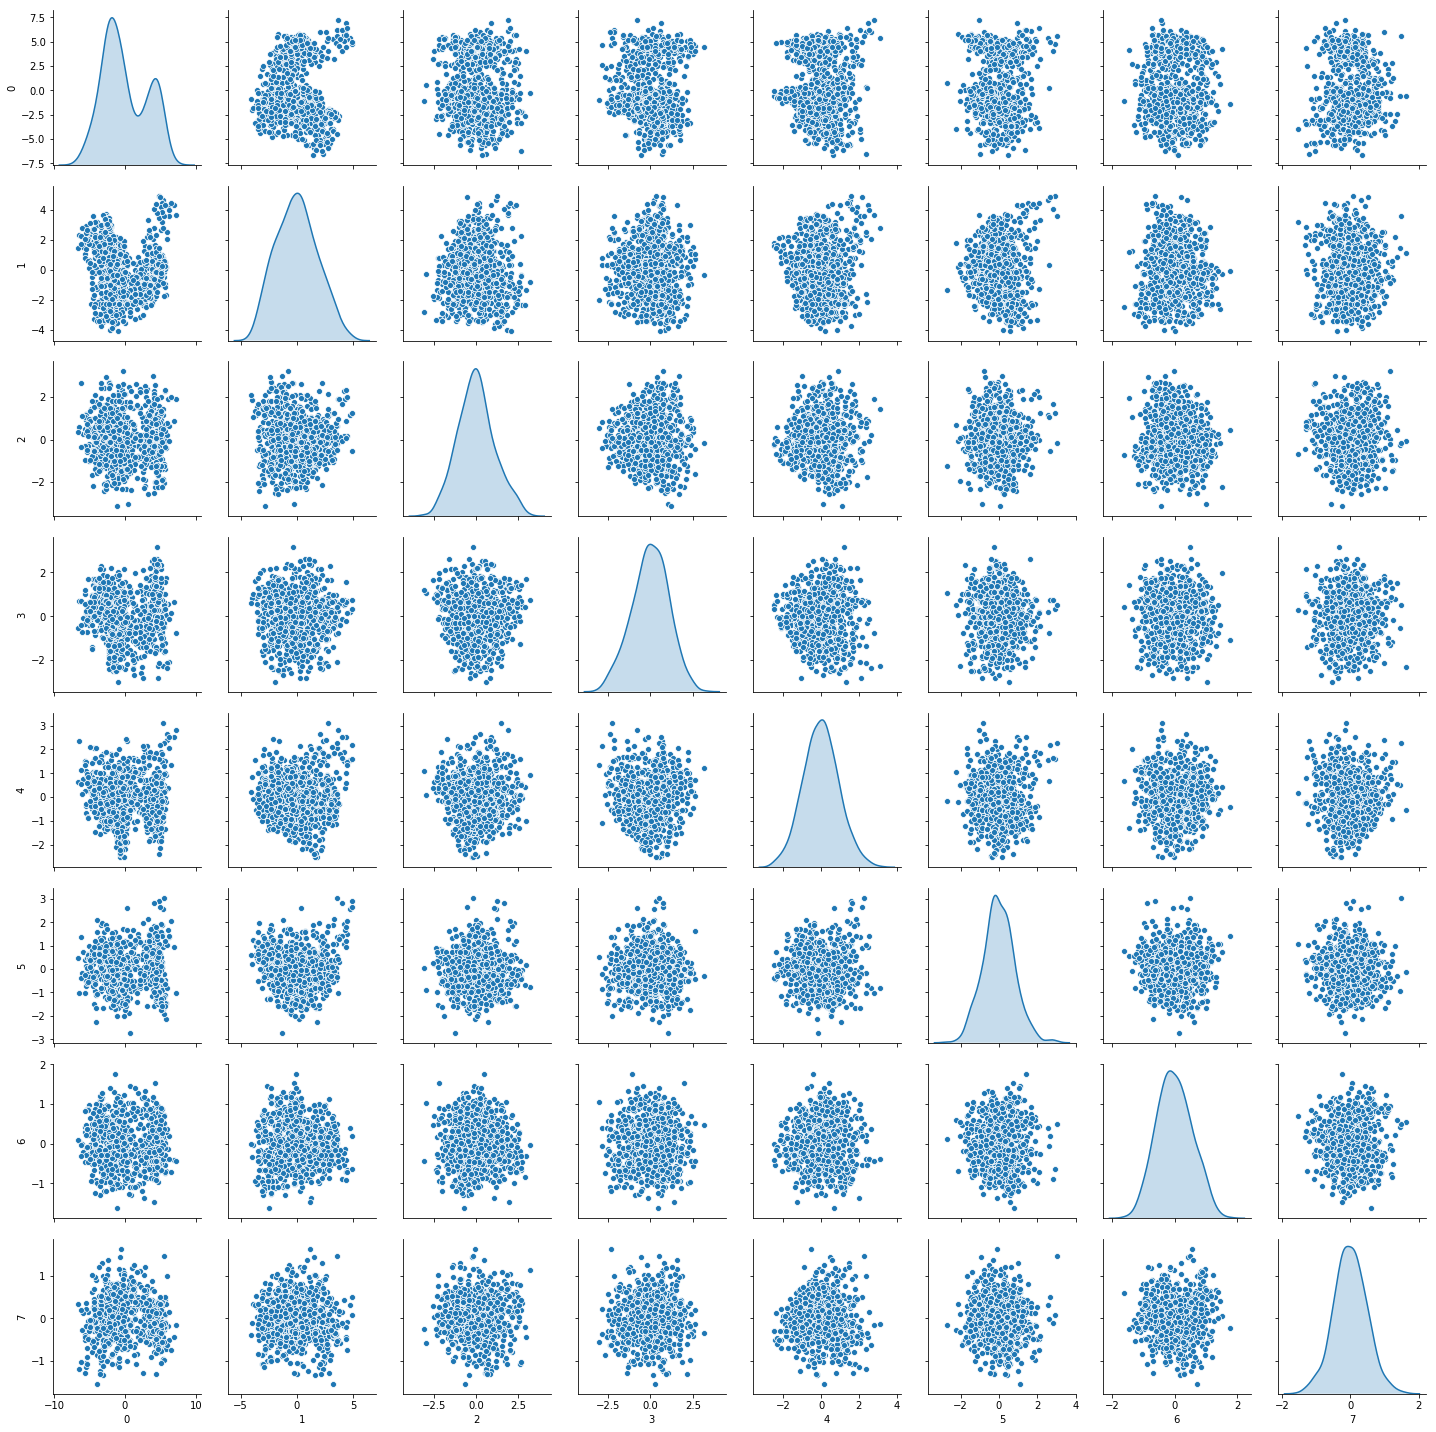

In [142]:
sns.pairplot(Proj_data_df, diag_kind='kde')

## Building SVM Model 

In [156]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(Proj_data_df,y, test_size = 0.2, random_state = 10)

In [158]:
X_train.head(2)

0         1         2         3         4         5         6  \
572 -0.232531 -1.560474 -1.316722  0.001368 -0.531317 -0.795253  0.215177   
307  3.839007 -0.103146 -0.576755  0.709497 -0.922282  1.372073  0.801104   

            7  
572 -0.267276  
307  0.096405

In [163]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model_poly = SVC(C= .1, kernel='poly', gamma= 1)
svc_model_linear = SVC(C= .1, kernel='linear', gamma= 1)

def SVMModel(model,X_train, y_train):
    print(model)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    # check the accuracy on the training set
    print(model.score(X_test, y_test))
    print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


In [164]:
SVMModel(svc_model_linear,X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.8647058823529412
Confusion Matrix:
 [[42  8  2]
 [ 2 71  1]
 [ 0 10 34]]


In [165]:
SVMModel(svc_model_poly,X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.9117647058823529
Confusion Matrix:
 [[41  7  2]
 [ 2 81  2]
 [ 1  1 33]]


In [167]:
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
svc_model=svm.SVC()
#Hyper Parameters Set
params = {'C': [0.01, 0.05, 0.5, 1],
          'kernel': ['linear','rbf','poly']}
#Making models with hyper parameters sets
model_gridSearchCV = GridSearchCV(svc_model, param_grid=params, n_jobs=-1, cv=10)
#Learning
model_gridSearchCV.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_gridSearchCV.best_params_)
#Prediction
prediction2=model_gridSearchCV.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction2,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction2, y_test))

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.9529411764705882
Confusion Metrix:
 [[44  1  0]
 [ 0 84  3]
 [ 0  4 34]]


### Observation
- For C=1.0 and kernal='rbf', we have got the highest accuracy of 95.2%
- This is cross validated with 10 number of folds in a `(Stratified)KFold`